In [1]:
import pickle, sys, os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import LogLocator

In [2]:
import NNMFit
from NNMFit.utilities.readout_graphs import HistogramGraph
from NNMFit.core.analysis_config import AnalysisConfig

In [3]:
sys.path.append("/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/notebooks")
from plot_utils import *

Lets add some systematics!!

In [4]:
configs_dir = "/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/configs/flavor_globalfit/"
config_hdl_systematics = AnalysisConfig.from_configs(
        main_config_file=f"{configs_dir}/main.cfg",
        analysis_config_file = f"{configs_dir}/analysis_configs/asimov/SAY/asimov_SAY_HESEBestfit.yaml",
        config_dir=configs_dir,
        override_dict=None,
        override_config_files=None,
        override_components_files=None,
        override_parameters_files=None)
# build a histogram
hist_graph_hdl_systematics = HistogramGraph(config_hdl_systematics)
detector_configs = config_hdl_systematics.get_det_configs()

In [5]:
plotting_path = "/data/user/tvaneede/GlobalFit/reco_processing/NNMFit/notebooks/systematics/ftp_FinalTopology"
os.system(f"mkdir -p {plotting_path}")

0

IC86_pass2_SnowStorm_FTP_HESE_Cascades


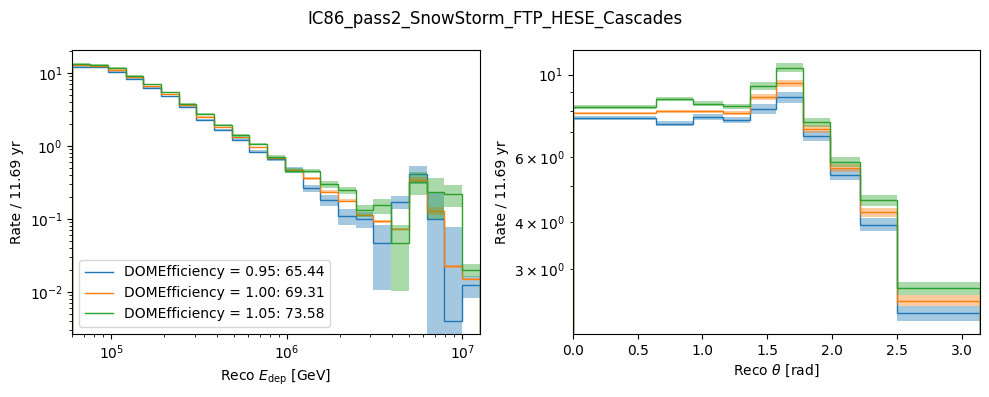

IC86_pass2_SnowStorm_FTP_HESE_DoubleCascades


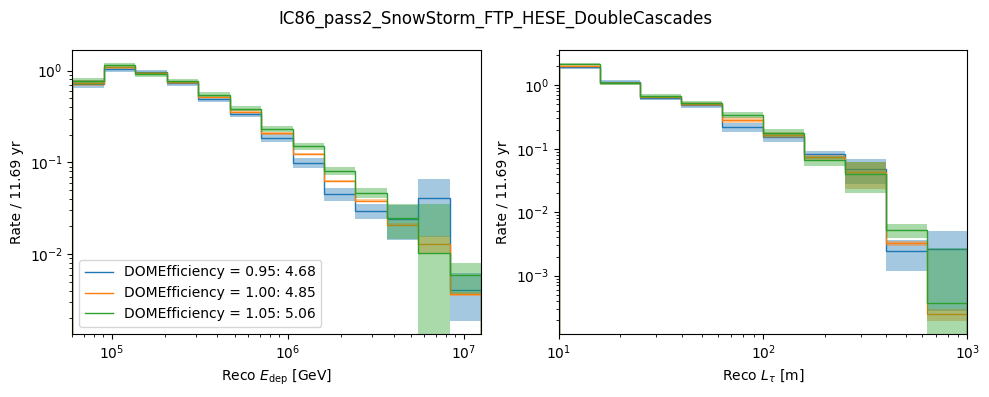

IC86_pass2_SnowStorm_FTP_HESE_Tracks


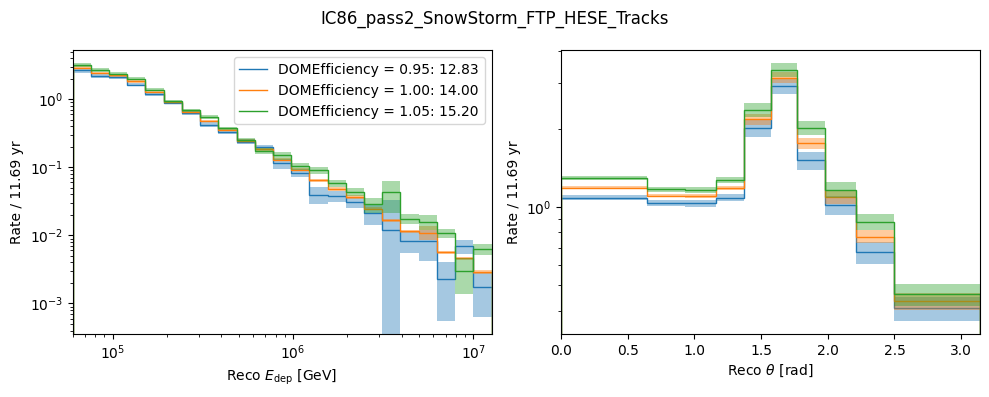

In [11]:
syst_param = "DOMEfficiency"
input_variables = {
    f"{syst_param} = 0.95" : {"dom_eff" : 0.95},
    f"{syst_param} = 1.00" : {"dom_eff" : 1.0},
    f"{syst_param} = 1.05" : {"dom_eff" : 1.05}
}
for det_config in detector_configs: 
    plot_histogram(hist_graph_hdl=hist_graph_hdl_systematics, det_config=det_config, input_variables = input_variables,ylog=True,
                   savepath=f"{plotting_path}/{det_config}_{syst_param}_ylog-True.png")


IC86_pass2_SnowStorm_FTP_HESE_Cascades


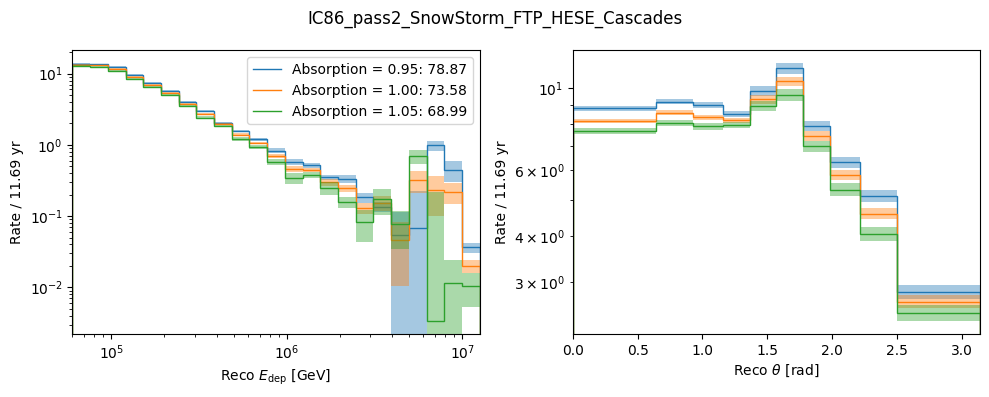

IC86_pass2_SnowStorm_FTP_HESE_DoubleCascades


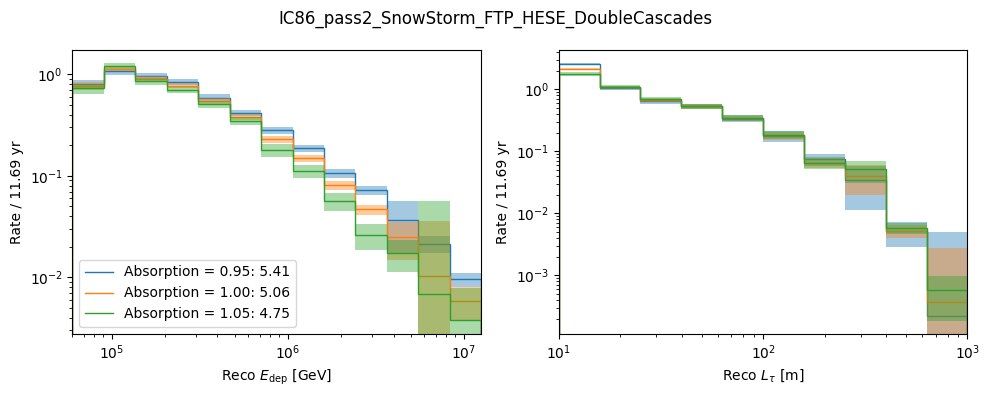

IC86_pass2_SnowStorm_FTP_HESE_Tracks


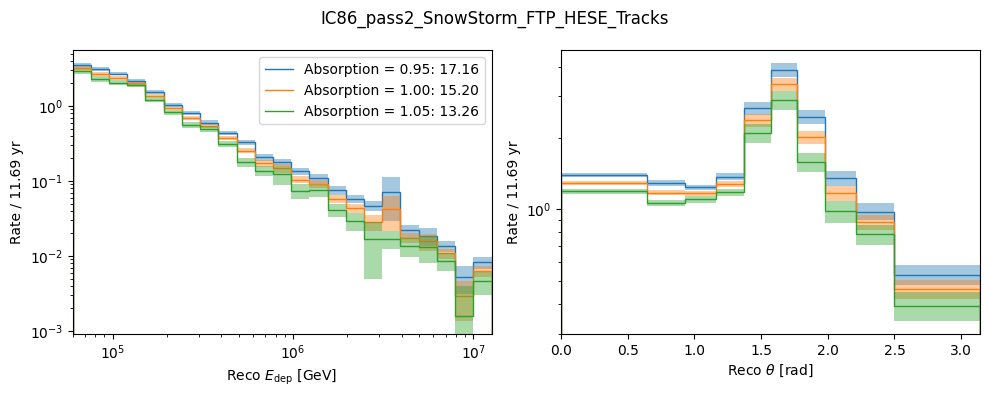

In [13]:
syst_param = "Absorption"
input_variables = {
    f"{syst_param} = 0.95" : {"ice_abs" : 0.95},
    f"{syst_param} = 1.00" : {"ice_abs" : 1.0},
    f"{syst_param} = 1.05" : {"ice_abs" : 1.05}
}
for det_config in detector_configs: 
    plot_histogram(hist_graph_hdl=hist_graph_hdl_systematics, det_config=det_config, input_variables = input_variables,ylog=True,
                   savepath=f"{plotting_path}/{det_config}_{syst_param}_ylog-True.png")

IC86_pass2_SnowStorm_FTP_HESE_Cascades


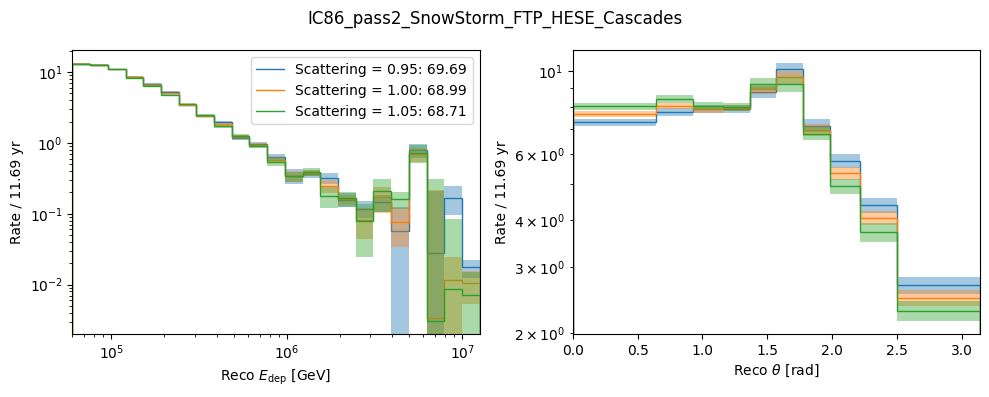

IC86_pass2_SnowStorm_FTP_HESE_DoubleCascades


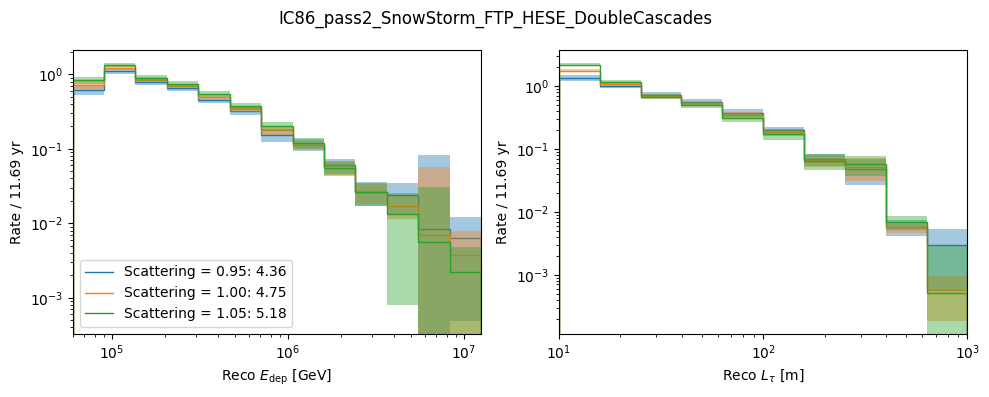

IC86_pass2_SnowStorm_FTP_HESE_Tracks


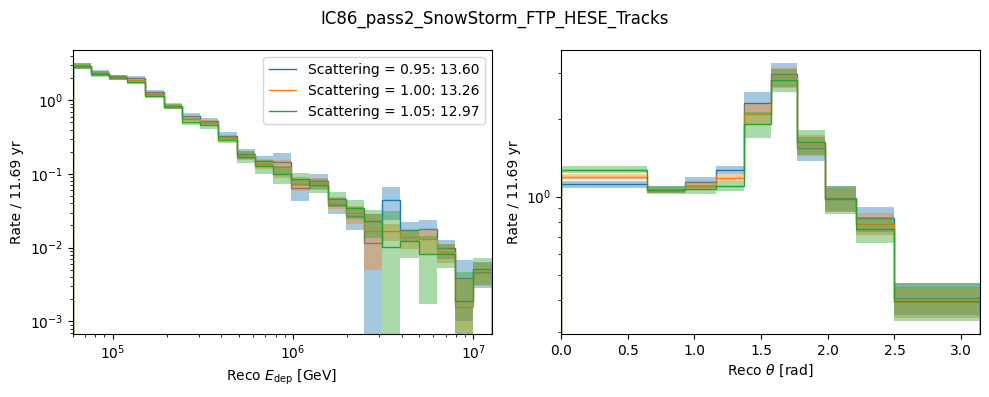

In [ ]:
syst_param = "Scattering"
input_variables = {
    f"{syst_param} = 0.95" : {"ice_scat" : 0.95},
    f"{syst_param} = 1.00" : {"ice_scat" : 1.0},
    f"{syst_param} = 1.05" : {"ice_scat" : 1.05}
}
for det_config in detector_configs: 
    plot_histogram(hist_graph_hdl=hist_graph_hdl_systematics, det_config=det_config, input_variables = input_variables,ylog=True,
                   savepath=f"{plotting_path}/{det_config}_{syst_param}_ylog-True.png")

IC86_pass2_SnowStorm_FTP_HESE_Cascades


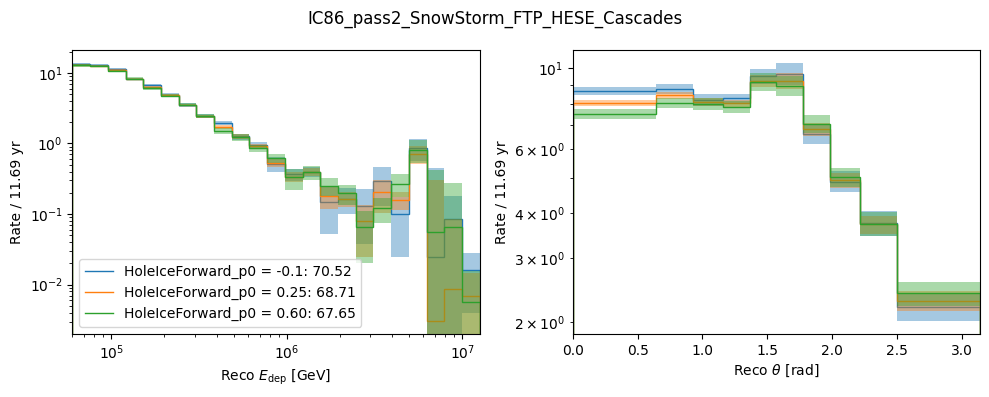

IC86_pass2_SnowStorm_FTP_HESE_DoubleCascades


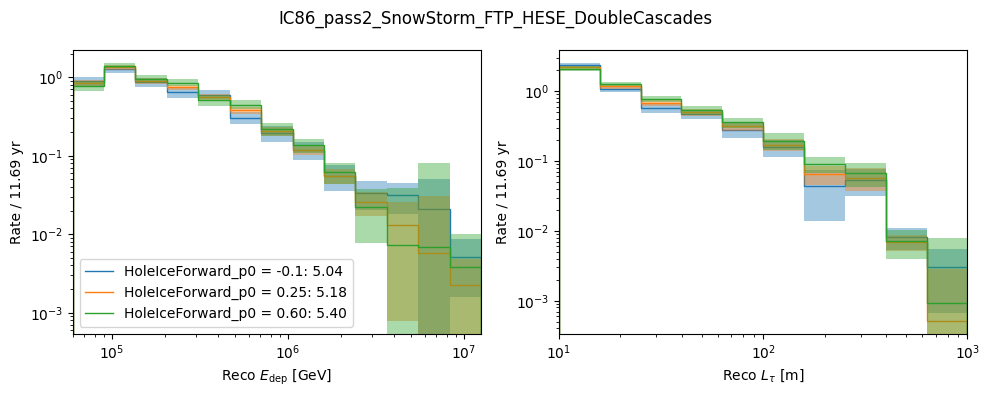

IC86_pass2_SnowStorm_FTP_HESE_Tracks


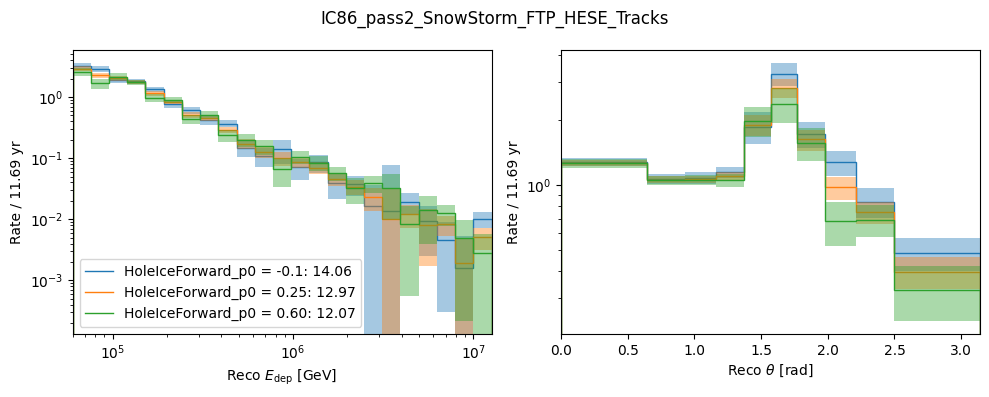

In [16]:
syst_param = "HoleIceForward_p0"
input_variables = {
    f"{syst_param} = -0.1" : {"ice_holep0" : -0.1},
    f"{syst_param} = 0.25": {"ice_holep0" : 0.24901831812365854},
    f"{syst_param} = 0.60": {"ice_holep0" : 0.5980366362473171}
}
for det_config in detector_configs:
    plot_histogram(hist_graph_hdl=hist_graph_hdl_systematics, det_config=det_config, input_variables = input_variables,ylog=True,
                   savepath=f"{plotting_path}/{det_config}_{syst_param}_ylog-True.png")

IC86_pass2_SnowStorm_FTP_HESE_Cascades


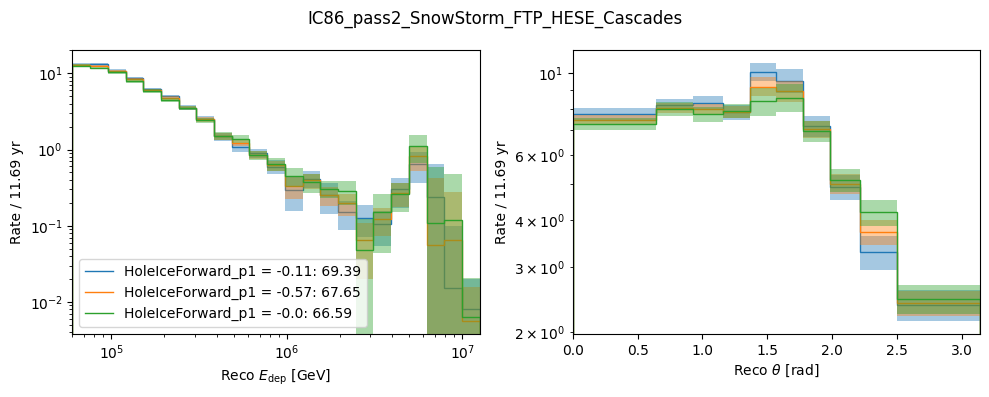

IC86_pass2_SnowStorm_FTP_HESE_DoubleCascades


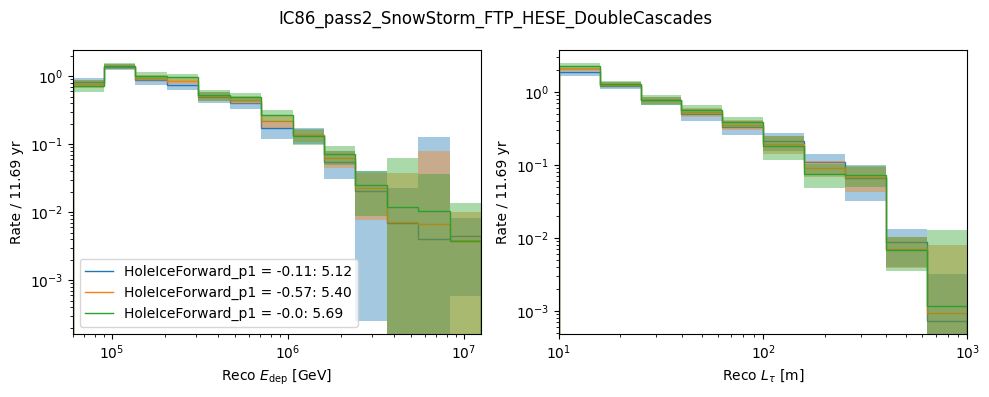

IC86_pass2_SnowStorm_FTP_HESE_Tracks


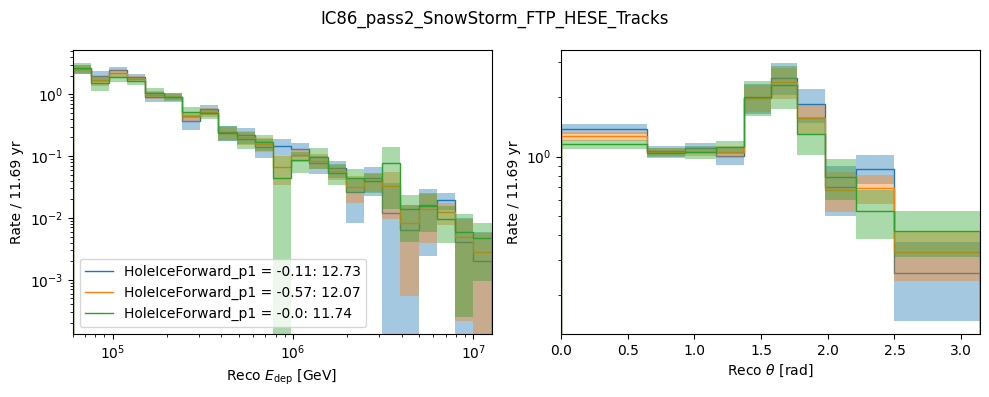

In [17]:
syst_param = "HoleIceForward_p1"
input_variables = {
    f"{syst_param} = -0.11" : {"ice_holep1" : -0.1135759700999585},
    f"{syst_param} = -0.57": {"ice_holep1" : -0.05678798504997925},
    f"{syst_param} = -0.0": {"ice_holep1" : 0.0}
}
for det_config in detector_configs:
    plot_histogram(hist_graph_hdl=hist_graph_hdl_systematics, det_config=det_config, input_variables = input_variables,ylog=True,
                   savepath=f"{plotting_path}/{det_config}_{syst_param}_ylog-True.png")

IC86_pass2_SnowStorm_FTP_HESE_Cascades


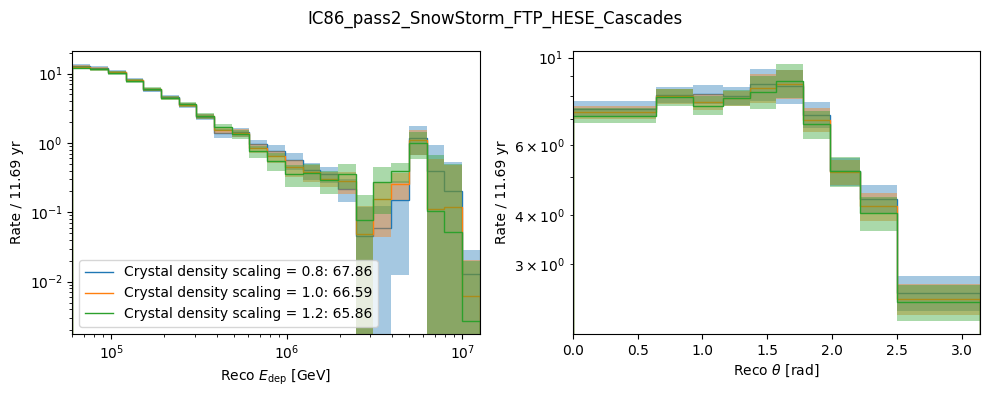

IC86_pass2_SnowStorm_FTP_HESE_DoubleCascades


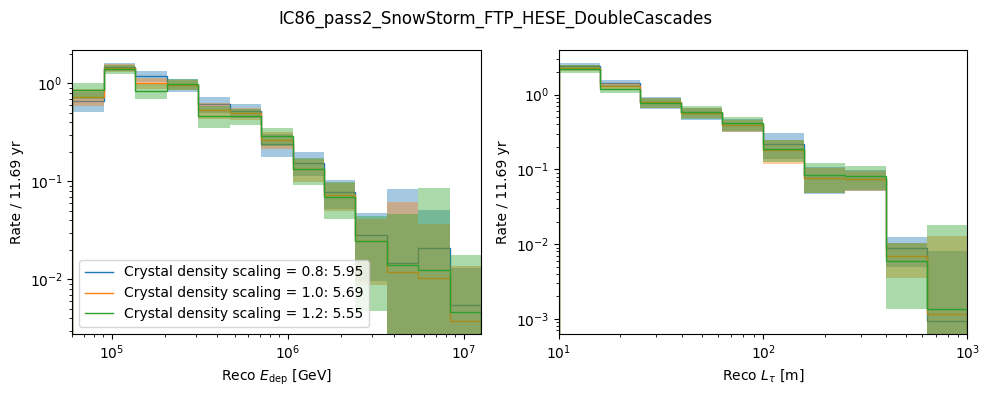

IC86_pass2_SnowStorm_FTP_HESE_Tracks


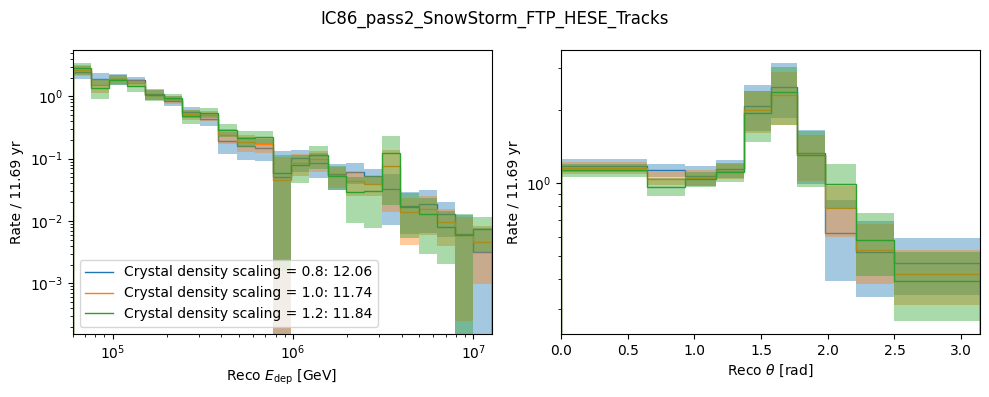

In [18]:
syst_param = "ice_crystal"
input_variables = {
    "Crystal density scaling = 0.8" : {"ice_crystal" : 0.8},
    "Crystal density scaling = 1.0" : {"ice_crystal" : 1.0},
    "Crystal density scaling = 1.2" : {"ice_crystal" : 1.2}
}
for det_config in detector_configs:
    plot_histogram(hist_graph_hdl=hist_graph_hdl_systematics, det_config=det_config, input_variables = input_variables,ylog=True,
                   savepath=f"{plotting_path}/{det_config}_{syst_param}_ylog-True.png")

IC86_pass2_SnowStorm_FTP_HESE_Cascades


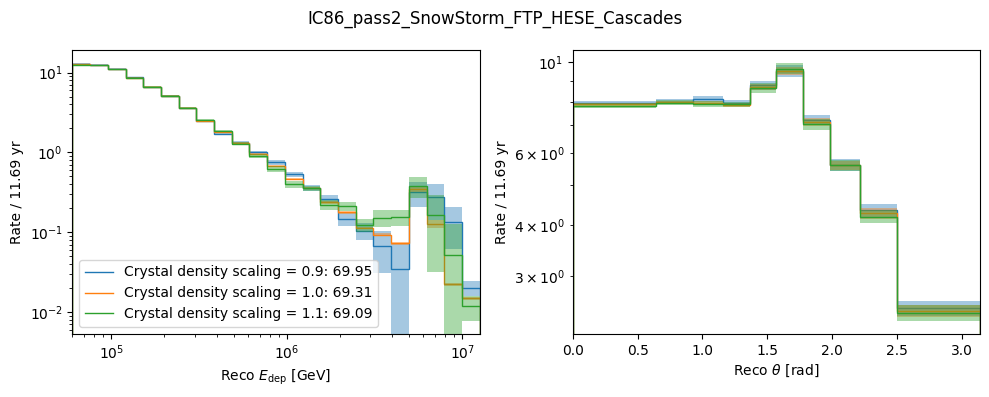

IC86_pass2_SnowStorm_FTP_HESE_DoubleCascades


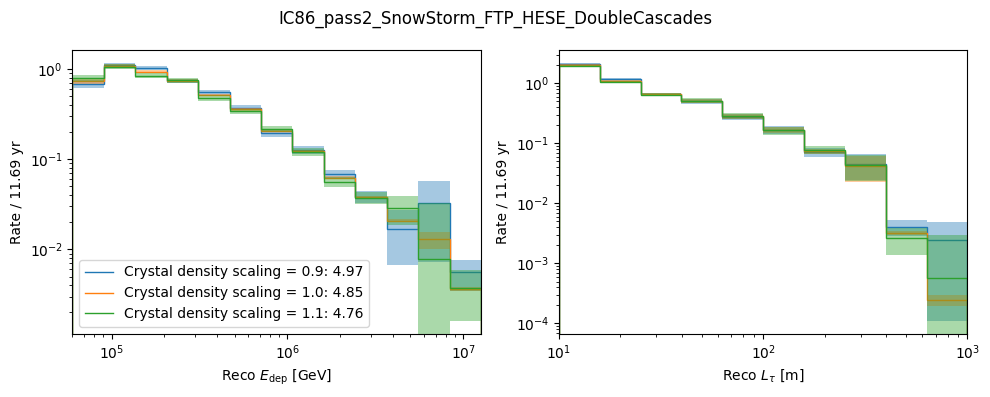

IC86_pass2_SnowStorm_FTP_HESE_Tracks


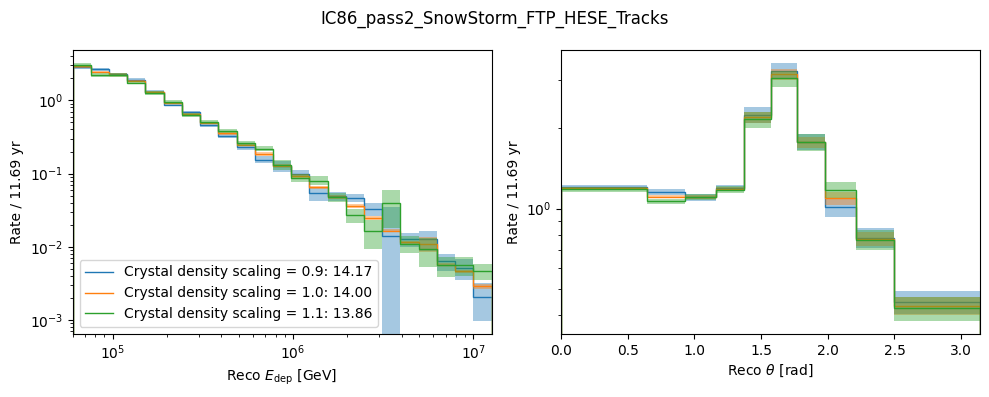

In [6]:
syst_param = "ice_crystal"
input_variables = {
    "Crystal density scaling = 0.9" : {"ice_crystal" : 0.9},
    "Crystal density scaling = 1.0" : {"ice_crystal" : 1.0},
    "Crystal density scaling = 1.1" : {"ice_crystal" : 1.1}
}
for det_config in detector_configs:
    plot_histogram(hist_graph_hdl=hist_graph_hdl_systematics, det_config=det_config, input_variables = input_variables,ylog=True,
                   savepath=f"{plotting_path}/{det_config}_{syst_param}_1sigma_ylog-True.png")